Import Data Set from scikit learn

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from sklearn.datasets import load_boston

In [3]:
dataset_boston = load_boston()
df= pd.DataFrame(dataset_boston.data, columns=dataset_boston.feature_names)
df['MEDV'] = dataset_boston.target

In [4]:
dataset_boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Data is loaded into Pandas
Proceeding with question #1

In [6]:
df.shape


(506, 14)

In [7]:
df.corr().round(2)*100

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,100.0,-20.0,41.0,-6.0,42.0,-22.0,35.0,-38.0,63.0,58.0,29.0,-39.0,46.0,-39.0
ZN,-20.0,100.0,-53.0,-4.0,-52.0,31.0,-57.0,66.0,-31.0,-31.0,-39.0,18.0,-41.0,36.0
INDUS,41.0,-53.0,100.0,6.0,76.0,-39.0,64.0,-71.0,60.0,72.0,38.0,-36.0,60.0,-48.0
CHAS,-6.0,-4.0,6.0,100.0,9.0,9.0,9.0,-10.0,-1.0,-4.0,-12.0,5.0,-5.0,18.0
NOX,42.0,-52.0,76.0,9.0,100.0,-30.0,73.0,-77.0,61.0,67.0,19.0,-38.0,59.0,-43.0
RM,-22.0,31.0,-39.0,9.0,-30.0,100.0,-24.0,21.0,-21.0,-29.0,-36.0,13.0,-61.0,70.0
AGE,35.0,-57.0,64.0,9.0,73.0,-24.0,100.0,-75.0,46.0,51.0,26.0,-27.0,60.0,-38.0
DIS,-38.0,66.0,-71.0,-10.0,-77.0,21.0,-75.0,100.0,-49.0,-53.0,-23.0,29.0,-50.0,25.0
RAD,63.0,-31.0,60.0,-1.0,61.0,-21.0,46.0,-49.0,100.0,91.0,46.0,-44.0,49.0,-38.0
TAX,58.0,-31.0,72.0,-4.0,67.0,-29.0,51.0,-53.0,91.0,100.0,46.0,-44.0,54.0,-47.0


# <font color='red'> Question 1. Pick and explore:
## Based on the table correlation RM, PTRATIO, and LSTAT have the highest correlation to the target MEDV.  
## I chose to look at PTRATIO since this could be an indicator of a good school district and is a key critieria for me in realestate purchasing.  

In [8]:
mean = df['PTRATIO'].mean()
round(mean,2)

18.46

In [9]:
std = df['PTRATIO'].std()
round(std,2)

2.16

In [10]:
df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

To quantitivley calculate bins I like to use the freeman-diaconis equation.  Requires the data range, IQR, and n.  Based on this equation I calcualted I need 14 bins.  

Note: this is 8 fewer bins than the excel default (sqrt of n).  

(array([ 15.,   1.,   1.,  55.,   8.,  32.,  13.,  60.,  50.,  54.,  16.,
        145.,  54.,   2.]),
 array([12.6       , 13.27142857, 13.94285714, 14.61428571, 15.28571429,
        15.95714286, 16.62857143, 17.3       , 17.97142857, 18.64285714,
        19.31428571, 19.98571429, 20.65714286, 21.32857143, 22.        ]),
 <a list of 14 Patch objects>)

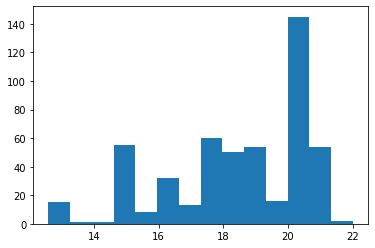

In [11]:
%matplotlib inline
attr = df['PTRATIO']
plt.hist(attr,bins =14)

Seaborn Distplot showing the pdf function on the histogram.

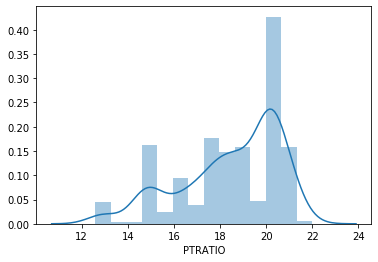

In [12]:
sns.distplot(df['PTRATIO'])

The PTRATIO distribution is highly left skewed

In [13]:
skew(df['PTRATIO'])

-0.7999445320367449

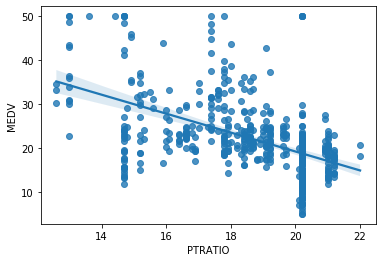

In [14]:
%matplotlib inline
X, y = df['PTRATIO'], df['MEDV']
Reg = sns.regplot(X,y)

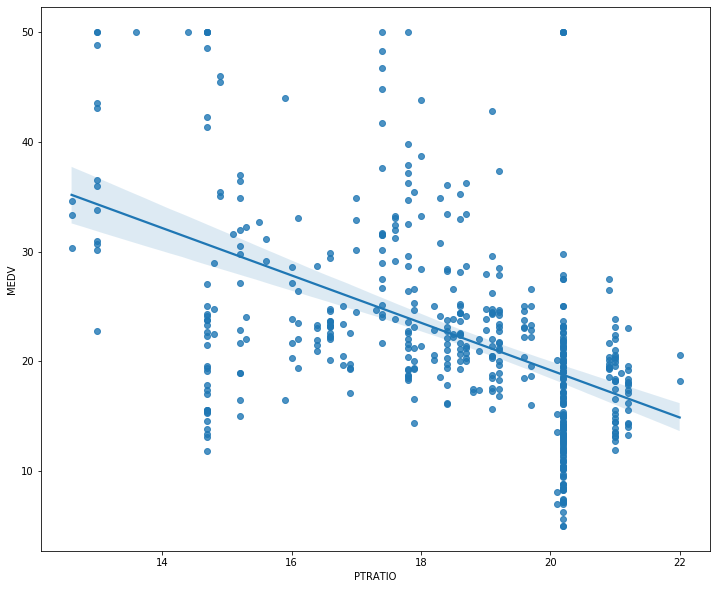

In [15]:
ax = plt.figure(figsize=(12, 10)).gca() # define axis
sns.regplot(x="PTRATIO", y="MEDV", data=df, ax = ax)

In [16]:
import statsmodels.api as sm # import statsmodels 

X = df["PTRATIO"] ## X usually means our input variables (or independent variables)
y = df["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.61e-34
Time:                        14:53:46   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The predictive relationship of PTRATIO provide by the 
## ANOVA table:  -2.15*PTRATIO + 62.34

# <font color='red'> Drop the censored value (50) in the target and test for statistical differences. 

In [17]:
df2=df.copy() # Copy original data frame into new working data frame. 

In [18]:
censorIndex = df2[df2['MEDV']==50].index  #drop the censored values from new dataframe
df2.drop(censorIndex, inplace=True)
df2.shape

(490, 14)

In [19]:
df2.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.38,0.46,-0.45
ZN,-0.20,1.00,-0.53,-0.05,-0.51,0.31,-0.56,0.67,-0.31,-0.30,-0.38,0.18,-0.42,0.40
INDUS,0.41,-0.53,1.00,0.04,0.77,-0.41,0.64,-0.71,0.60,0.72,0.39,-0.36,0.64,-0.60
CHAS,-0.06,-0.05,0.04,1.00,0.09,0.04,0.07,-0.08,-0.03,-0.07,-0.12,0.04,-0.01,0.07
NOX,0.42,-0.51,0.77,0.09,1.00,-0.32,0.73,-0.77,0.61,0.67,0.19,-0.38,0.61,-0.52
RM,-0.22,0.31,-0.41,0.04,-0.32,1.00,-0.27,0.25,-0.20,-0.28,-0.29,0.12,-0.61,0.69
AGE,0.35,-0.56,0.64,0.07,0.73,-0.27,1.00,-0.74,0.45,0.50,0.27,-0.28,0.64,-0.49
DIS,-0.38,0.67,-0.71,-0.08,-0.77,0.25,-0.74,1.00,-0.49,-0.53,-0.25,0.30,-0.54,0.37
RAD,0.63,-0.31,0.60,-0.03,0.61,-0.20,0.45,-0.49,1.00,0.91,0.46,-0.45,0.51,-0.48
TAX,0.58,-0.30,0.72,-0.07,0.67,-0.28,0.50,-0.53,0.91,1.00,0.45,-0.45,0.57,-0.57


In [20]:
len(df2['PTRATIO']) # Test to see if the new data frame df2 is different from df1

490

In [21]:
skew(df2['PTRATIO'])

-0.8211496849996284

In [22]:
df2['PTRATIO'].describe()

count    490.000000
mean      18.520000
std        2.110478
min       12.600000
25%       17.400000
50%       19.100000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [23]:
#predictors = sm.add_constant(df2.PTRATIO, prepend = False)

#lm_mod = sm.OLS(df2.MEDV, predictors)
#res = lm_mod.fit()
#print(res.summary())


In [24]:
import statsmodels.api as sm # import statsmodels 

X = df2["PTRATIO"] ## X usually means our input variables (or independent variables)
y = df2["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

df2['PTR_yhat']=model.fittedvalues  #add regression columns
df2['PTR_Res']=model.resid

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           4.34e-35
Time:                        14:53:48   Log-Likelihood:                -1628.6
No. Observations:                 490   AIC:                             3261.
Df Residuals:                     488   BIC:                             3270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.4326      2.689     21.362      0.000      52.150      62.715
PTRATIO       -1.9329      0.144    -13.400      0.000      -2.216      -1.649
==============================================================================
Omnibus:                       28.626   Durbin-Watson:                   0.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.404
Skew:                           0.496   Prob(JB):                     7.55e-09
Kurtosis:                       3.921   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  <font color = blue> Using PTRATIO to predict MEDV the equation changes to -1.93x + 57.43
### <font color = red>  While the correlation is reasonable at .51 the correlation of determination is much lower at 0.26

    
## ** Regression Plot with 50's removed



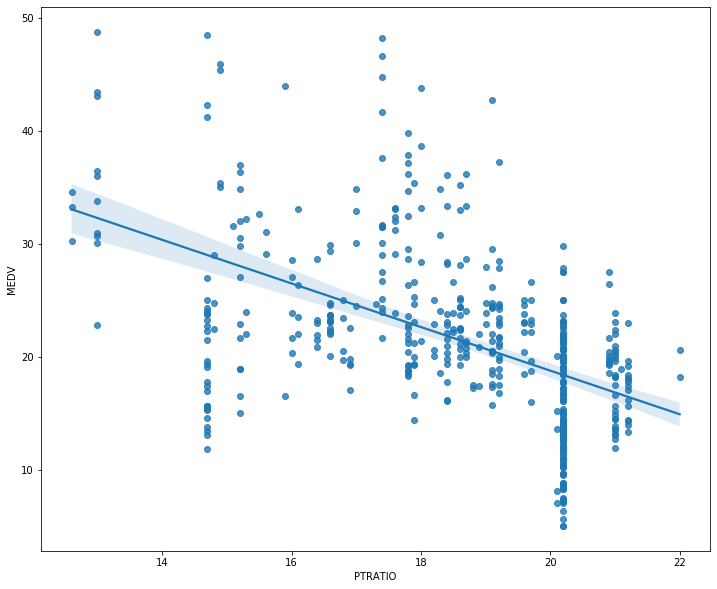

In [25]:
ax = plt.figure(figsize=(12, 10)).gca() # define axis
sns.regplot(x="PTRATIO", y="MEDV", data=df2, ax = ax)## regression plot using df2

## <font color = blue> Looking at the regression data incorporated into df2

In [26]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PTR_yhat,PTR_Res
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,27.859741,-3.859741
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,23.027581,-1.427581
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,23.027581,11.672419
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,21.288003,12.111997
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,21.288003,14.911997


In [27]:
df2['PTR_Res'].describe()

count    4.900000e+02
mean     1.794120e-14
std      6.724770e+00
min     -1.721946e+01
25%     -4.232088e+00
50%     -1.514300e-01
75%      3.511294e+00
max      2.449927e+01
Name: PTR_Res, dtype: float64

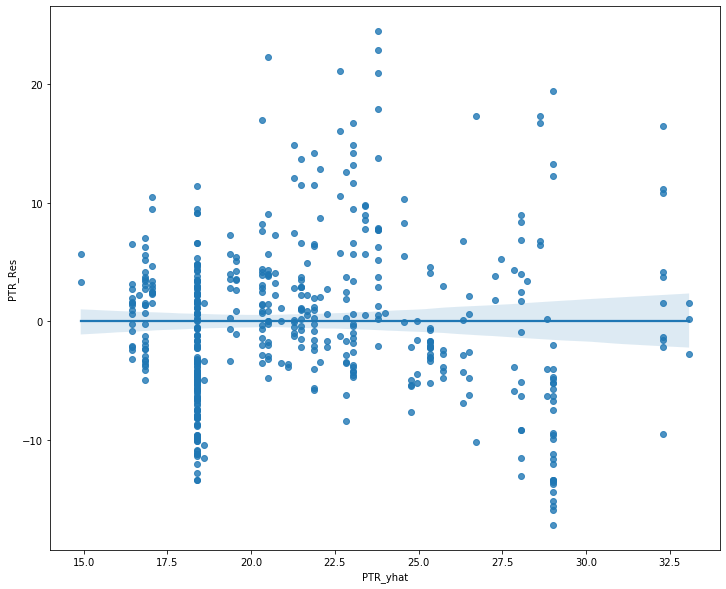

In [28]:
ax = plt.figure(figsize=(12, 10)).gca() # define axis
sns.regplot(x="PTR_yhat", y="PTR_Res", data=df2, ax = ax)

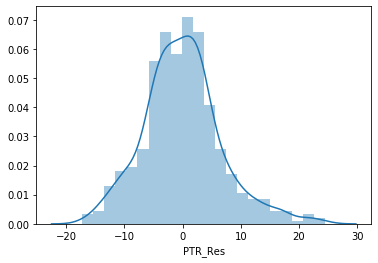

In [29]:
sns.distplot(df2['PTR_Res'])

##   Investigate the cumsum relationship in PTRATIO

In [30]:
df2['PTRATIO'].value_counts() ##probably could use a group by here- something to try later 
df3=df2['PTRATIO'].value_counts()
df3=pd.DataFrame({'number':df3.index, 'counts':df3}).sort_values(by = 'number')
n= len(df2['PTRATIO'])
df3['PTR_Percent']= [100* x/n for x in df3['counts']]

In [31]:
df3['PTR_CS']= df3['PTR_Percent'].cumsum()
df3

,number,counts,PTR_Percent,PTR_CS
12.6,12.6,3,0.612245,0.612245
13.0,13.0,10,2.040816,2.653061
14.7,14.7,29,5.918367,8.571429
14.8,14.8,3,0.612245,9.183673
14.9,14.9,4,0.816327,10.000000
15.1,15.1,1,0.204082,10.204082
15.2,15.2,13,2.653061,12.857143
15.3,15.3,3,0.612245,13.469388
15.5,15.5,1,0.204082,13.673469
15.6,15.6,2,0.408163,14.081633


Text(0, 0.5, 'Cumulative Percentage')

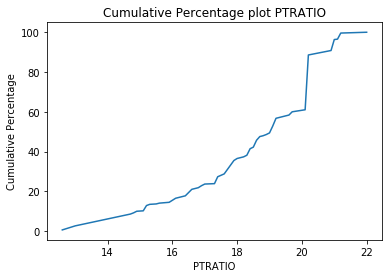

In [32]:
plt.plot(df3['PTR_CS'])
plt.title ("Cumulative Percentage plot PTRATIO")
plt.xlabel("PTRATIO")
plt.ylabel("Cumulative Percentage")

# <font color = 'red'> Question #2
 ## start by exploring the CHAS 0 and 1 counts and filtering the distribution.    

In [33]:
df2['CHAS'].value_counts()

0.0    461
1.0     29
Name: CHAS, dtype: int64

In [34]:
df5=df2[['CHAS','MEDV']]
df6=df5.copy()

In [35]:
CHASIndex = df5[df5['CHAS']==0].index
df5.drop(CHASIndex, inplace=True)
df5.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(29, 2)

In [36]:
df5.describe()


,CHAS,MEDV
count,29.0,29.000000
mean,1.0,23.979310
std,0.0,7.024161
min,1.0,13.400000
25%,1.0,20.000000
50%,1.0,22.400000
75%,1.0,27.000000
max,1.0,46.000000


In [37]:
Not_CHASIndex = df6[df6['CHAS']==1].index
df6.drop(Not_CHASIndex, inplace=True)
df6.shape

(461, 2)

In [38]:
df6.describe()

,CHAS,MEDV
count,461.0,461.000000
mean,0.0,21.488503
std,0.0,7.898848
min,0.0,5.000000
25%,0.0,16.500000
50%,0.0,20.600000
75%,0.0,24.500000
max,0.0,48.800000


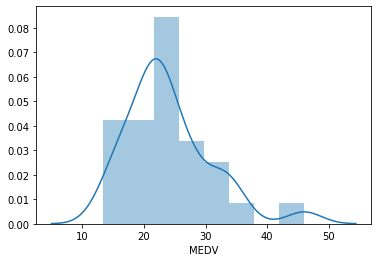

In [39]:
sns.distplot(df5['MEDV'])

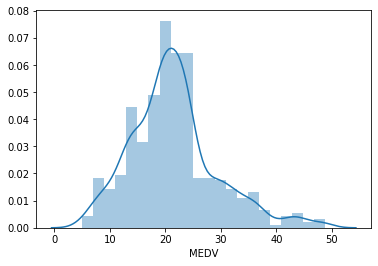

In [40]:
sns.distplot(df6['MEDV'])

In [41]:
df6['MEDV'].mean() # this is the value of the H0:  

21.488503253796125

In [42]:
T_array=df5['MEDV']

In [43]:
stats.ttest_1samp(T_array,21.48)

NameError: name 'stats' is not defined

In [44]:
#p-Value for a one tailed test
pvalue_1T= 0.06560948/2
print('P-value one tail test is', pvalue_1T)

P-value one tail test is 0.03280474


In [45]:
from scipy import stats
stats.ttest_1samp(T_array,[21])

Ttest_1sampResult(statistic=array([2.2841271]), pvalue=array([0.03014924]))

In [46]:
stats.ttest_1samp(df5['MEDV'],21.48)

Ttest_1sampResult(statistic=1.9161288418938323, pvalue=0.06560948455970432)

In [47]:
pv2=0.06560948455970432/2
pv2

0.03280474227985216

In [48]:
from scipy.stats import sem, t
con=.90
n=len(df5)
m=df5['MEDV'].mean()
std_err=sem(df5['MEDV'])
h=std_err*t.ppf((1+con)/2,n-1)
upper= m+h
lower= m-h
print('The standard error =', std_err)
print('A 90% CI of Median value for tracks adjecent to the Charles River is',
      round(lower,2) ,'<', round(m,2), '<', round(upper,2), ':or from 21.76 to 26.2')


The standard error = 1.3043540132496296
A 90% CI of Median value for tracks adjecent to the Charles River is 21.76 < 23.98 < 26.2 :or from 21.76 to 26.2


##  <font color = 'blue'> Solve for sample size based on the assumption of a 0.60 Cohen's d and .80 power:

In [49]:
#Cohen's d question
from statsmodels.stats.power import tt_ind_solve_power
tt_ind_solve_power(effect_size=.6, nobs1 = None, alpha=0.05, power=.8, ratio=1, alternative='two-sided')

44.5857902590805

In [50]:
## create list of d values
d_vals = [x/10.0 for x in range(2,20)]

## Initialize data frame
powers = pd.DataFrame({'sample_size':range(20,210,10)})
## Loop over d values
for d_val in d_vals:
    col_name = 'd = ' + str(d_val)
    ## List comprehension for each d value itterating over the sample sizes
    powers[col_name] = [tt_ind_solve_power(effect_size=d_val, nobs1 = x, alpha=0.05, power=None, ratio=1, alternative='two-sided')
                      for x in range(20,210,10)]
        
powers   

,sample_size,d = 0.2,d = 0.3,d = 0.4,d = 0.5,d = 0.6,d = 0.7,d = 0.8,d = 0.9,d = 1.0,d = 1.1,d = 1.2,d = 1.3,d = 1.4,d = 1.5,d = 1.6,d = 1.7,d = 1.8,d = 1.9
0,20,0.094567,0.152268,0.234349,0.337939,0.456034,0.578290,0.693404,0.792036,0.868953,0.923550,0.958827,0.979575,0.990685,0.996100,0.998503,0.999473,0.999831,0.99995
1,30,0.118679,0.207852,0.331522,0.477897,0.627505,0.759905,0.861423,0.928872,0.967708,0.987086,0.995465,0.998605,0.999625,0.999912,1.000000,1.000000,1.000000,1.00000
2,40,0.143080,0.263284,0.423521,0.598147,0.754952,0.871133,0.942182,0.978044,0.992985,0.998122,0.999580,0.999922,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
3,50,0.167675,0.317802,0.508186,0.696893,0.843875,0.933907,0.977279,0.993712,0.998607,0.999754,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
4,60,0.192375,0.370802,0.584382,0.775266,0.903115,0.967314,0.991481,0.998300,0.999742,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
5,70,0.217094,0.421819,0.651730,0.835822,0.941194,0.984313,0.996925,0.999561,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
6,80,0.241758,0.470512,0.710370,0.881602,0.964976,0.992660,0.998925,0.999891,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
7,90,0.266296,0.516642,0.760782,0.915587,0.979481,0.996639,0.999634,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
8,100,0.290646,0.560059,0.803647,0.940427,0.988152,0.998490,0.999878,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
9,110,0.314751,0.600687,0.839748,0.958341,0.993246,0.999333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Text(0.5, 0, 'Sample Size')

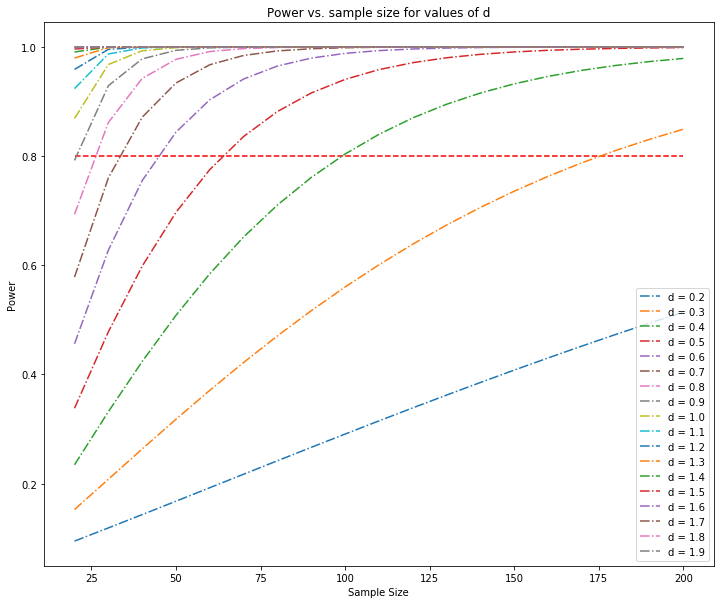

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(12,10)) # define plot area
ax = fig.gca() # define axis
powers.plot(x = 'sample_size', ax = ax, linestyle = '-.')
plt.hlines(y = 0.8, xmin = 20, xmax = 200, color = 'red', linestyle = '--')
plt.title('Power vs. sample size for values of d')
plt.ylabel('Power')
plt.xlabel('Sample Size')

##  The graph above depicts the power/sample size distribution for a given cohen's d effect size. 

### <font color ='red'> For question #2:  With an effect magnitude of 0.60 the required sample size is n=45 to achieve the goal for 80% power.  

##  <font color ='red'> Q3.
    
## <font color = 'red'> Design an experiment to test the impact of new features not present in the data set
###<font color = 'blue'> As the new city planner, I have been looking for ideas to make the city more desirable, and increasing property values.  

Research has shown that nature trails have positive impact on property value, offer residence solidarity, and require minimum city maintenance compared to parks.  Maintaince could actualy be delegated to volunteer groups advocating hiking or moutain biking.   This would be a win win for the city.  

A Texas based study (sales from a single county) from headwater economic estimated the effect for a variety of features including various trails, tennis courts and neighborhood pools.   
https://headwaterseconomics.org/trail/23-impacts-trails-greenbelts-home-price/

##  Nature trails with attached greenbelt exhibited the highest effect of 5%.    



(array([ 21.,  48.,  81., 147.,  96.,  39.,  30.,  13.,   8.,   7.]),
 array([ 5.  ,  9.38, 13.76, 18.14, 22.52, 26.9 , 31.28, 35.66, 40.04,
        44.42, 48.8 ]),
 <a list of 10 Patch objects>)

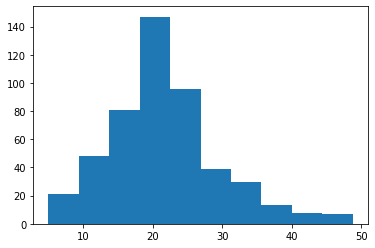

In [52]:
plt.hist(df2['MEDV'])

In [53]:
df2['MEDV'].describe()

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64

 ## With the maximum expected impact from greenbelt trails the city could see a mean value improvment from 21.63 to 22.71 

In [54]:
#Cohen's d question
from statsmodels.stats.power import tt_ind_solve_power
tt_ind_solve_power(effect_size=.05, nobs1 = None, alpha=0.05, power=.8, ratio=1, alternative='two-sided')

6280.049008707864

## In order to test for an effect as small as 5% a significant sample size is required.  Over 3,000 tracks will have to be studied to achieve a statistical power of 50%   

## Over 6,000 samples would be required to achieve 80% power.  

## <font color = 'red'> Expanding this type of research to more than one state and county could reveal larger effect sizes in certain circumstances.  For instance the prescence of a green belt nature trail in proximity of urban or suburban cities.  

## Q3 Continued:  In addition to adding natrue trails two parameters within the data set have peaked interest(RM, PTRATIO).  A multireggression model with training is desired to predict median values.    

In [55]:
df5.head()

,CHAS,MEDV
142,1.0,13.4
152,1.0,15.3
154,1.0,17.0
155,1.0,15.6
160,1.0,27.0


In [56]:
X = df2[['RM', 'PTRATIO']]
y = df2['MEDV']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
#model.summary()


In [57]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

X = df2[['RM', 'PTRATIO']]
y = df2['MEDV']

lm=linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = model.predict(X)
#print(predictions)
print('R² of the model is: ', round(lm.score(X,y),2))
print('variable coefficients of the model are: ', lm.coef_)
print('Y intercept of the model is: ', round(lm.intercept_,2))
print('The equation for relationship is: 1.61+7.04(RM)-1.29(PTRATIO)')




R² of the model is:  0.58
variable coefficients of the model are:  [ 7.04257432 -1.29361186]
Y intercept of the model is:  1.61
The equation for relationship is: 1.61+7.04(RM)-1.29(PTRATIO)


## Another version with more sophisticated code

In [58]:
reg=linear_model.LinearRegression()
reg.fit(df2[['RM','PTRATIO']],df2.MEDV)
print('Regression coef:', reg.coef_)
print('Intercept value', reg.intercept_)
print('R² value',reg.score(X,y))
print('MEDV Predict',reg.predict([[9,20]]))



Regression coef: [ 7.04257432 -1.29361186]
Intercept value 1.6094133462519302
R² value 0.5815885778012708
MEDV Predict [39.12034498]


## This relationship will help the city planner establish zoning standards.
   1. Acceptable number of rooms or bed rooms for new constructions or remodels.   
   2. Need for additional schools or school improvments. 